In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='anatar', api_key='GzHwMu8P9KCQCL6pIYnh')
import plotly.plotly as py
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [44]:
df = pd.read_csv("../data/NCHS_-_Leading_Causes_of_Death__United_States.csv")
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


In [45]:
#Group by state
criteria_2000 = (df['State'] != 'United States') & (df['Year'] == 2002)
criteria1 = (df['State'] != 'United States')
dr = df[criteria1]
death_rates_2000 = df[criteria_2000]

In [46]:
dr_2000 = (death_rates_2000.groupby('State')
 .agg({'Age-adjusted Death Rate': 'sum'})
 .reset_index()
 .rename(columns={'Age-adjusted Death Rate':'Cumulative Death Rate'})
)
dr_2000


,State,Cumulative Death Rate
0,Alabama,1860.8
1,Alaska,1442.3
2,Arizona,1493.5
3,Arkansas,1800.6
4,California,1433.3
5,Colorado,1451.3
6,Connecticut,1405.9
7,Delaware,1555.9
8,District of Columbia,1847.7
9,Florida,1457.8


In [47]:
#dr_cause = (df.groupby('Cause Name')).agg(['mean', 'count'])
#df.groupby(['Cause Name']).size().reset_index(name='counts')
df.groupby('Cause Name')['Deaths'].agg(['sum']).sort_values(['sum'])

,sum
Cause Name,
Pneumonitis due to solids and liquids,589791.0
Homicide,590599.0
Parkinson's disease,696518.0
Essential hypertension and hypertensive renal disease,841098.0
Chronic liver disease and cirrhosis,1043674.0
Septicemia,1188968.0
Suicide,1209756.0
Kidney Disease,1515868.0
Influenza and pneumonia,1974864.0


In [48]:
#State Names to State Code Translation
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

dr_2000['State_Code'] = dr_2000['State'].map(states)
dr_2000


,State,Cumulative Death Rate,State_Code
0,Alabama,1860.8,AL
1,Alaska,1442.3,AK
2,Arizona,1493.5,AZ
3,Arkansas,1800.6,AR
4,California,1433.3,CA
5,Colorado,1451.3,CO
6,Connecticut,1405.9,CT
7,Delaware,1555.9,DE
8,District of Columbia,1847.7,DC
9,Florida,1457.8,FL


In [49]:

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

scl = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        [0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dr_2000['State_Code'],
        z = dr_2000['Cumulative Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = dr_2000['Cumulative Death Rate'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Death Rate by State")
        ) ]
layout = dict(
        title = 'Death Rate by State in 2000)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig)

In [50]:
dr['State_Code'] = dr['State'].map(states)
drr = dr.groupby(['Year','State_Code'], as_index=False)['Age-adjusted Death Rate'].sum()
drr.head()

/Users/AP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Year,State_Code,Age-adjusted Death Rate
0,1999,AK,1523.2
1,1999,AL,1859.7
2,1999,AR,1788.9
3,1999,AZ,1514.5
4,1999,CA,1492.7


In [51]:
drr_pivot=drr.pivot(index='State_Code', columns='Year', values='Age-adjusted Death Rate')

In [52]:
import cufflinks as cf
import numpy as np

#drr_pivot.iplot()


In [53]:
df_11 = pd.read_csv("../data/11.csv")
df_11.head()

,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
0,88426,70,1.0,2,5.0,3.0,11.0,4.0,909,151,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,88427,79,1.0,2,2.0,3.0,11.0,4.0,909,132,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88428,34,1.0,1,1.0,3.0,8.0,4.0,909,155,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,88429,32,1.0,2,1.0,3.0,8.0,1.0,909,155,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,88430,2,1.0,2,NaN,3.0,8.0,NaN,909,145,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(df_11.columns)
df_11.describe(include='all')
#Feature Engineering
#Drop the following features from consideration - 1st cut
first_cut_df = df_11.drop(columns=['record','follow', 'dayod',
       'hosp', 'hospd', 'rcow', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'])

Index(['record', 'age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod',
       'hosp', 'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct',
       'stater', 'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'],
      dtype='object')


In [55]:
df_11.count()

record      1835072
age         1835072
race        1832182
sex         1835072
ms          1473846
hisp        1782570
adjinc      1790803
educ        1484202
pob         1835072
wt          1835072
hhid        1835072
hhnum       1835072
reltrf      1830398
occ          979747
majocc       979747
ind          979526
majind       979526
esr         1484169
urban       1822030
smsast      1822016
inddea      1835072
cause113    1835072
follow      1835072
dayod        160750
hosp         157794
hospd        145174
ssnyn       1835072
vt          1439021
histatus    1257307
hitype      1257307
povpct      1835072
stater      1835072
rcow         981362
tenure      1809625
citizen      464861
health       384129
indalg       348759
smok100           0
agesmk            0
smokstat          0
smokhome          0
curruse           0
everuse           0
dtype: int64

In [56]:
#first_cut_df.groupby(['majocc'])['majocc'].count()

In [57]:
#first_cut_df.groupby(['majind'])['majind'].count()

In [58]:
#df.describe()

In [59]:
#Feature Engineering
#Drop the following features from consideration - 1st cut
first_cut_df = df_11.drop(columns=['record','follow', 'dayod',
       'hosp', 'hospd', 'rcow', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'])




In [60]:

first_cut_df.groupby(['cause113'])['cause113'].count()

#first_cut_df_deceased.info()

cause113
0      1674347
1            1
3           76
4           63
5           16
7            1
8           12
9         1522
12           1
14         181
17        1231
18         554
19         797
20        1079
21        4398
22         738
23        2144
24         281
25       11046
26         513
27        3231
28         311
29         464
30        1066
31        2523
32         814
33         858
34         924
35         124
36        1533
        ...   
84         107
85        1793
86           3
87          83
88          26
89           9
90           3
91          19
92           7
93         282
94        1485
95        9875
96        2799
97          54
98         147
99         997
100         99
101        216
102        221
103        516
104       1060
105       1293
106        846
107        626
108        378
109         19
110         36
111        178
112          2
113        196
Name: cause113, Length: 106, dtype: int64

In [61]:
def cause_of_death(c):
  #if c['cause113'].isin([49,50,51,52,53,54,55,56,57,58,59]):
  if np.any(c['cause113'] == [10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 48]):
    return 'Diseases of Heart'
  elif np.any(c['cause113'] == [18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]):
    return 'Malignant Neoplasms'
  elif np.any(c['cause113'] == [61,]):
    return 'Cerebrovascular Diseases'
  elif np.any(c['cause113'] == [70,71,72,73]):
    return 'Respiratory Diseases'
  elif np.any(c['cause113'] == [96,97,98,99,100,101,102,103,104]):
    return 'Accidents'
  elif np.any(c['cause113'] == [66,67]):
    return 'Influenza and Pneumonia '
  elif np.any(c['cause113'] == [43]):
    return 'Diabetes'
  elif np.any(c['cause113'] == [105,106]):
    return 'Suicide'
  elif np.any(c['cause113'] == [83,84,85,86]):
    return 'Nephritis'
  elif np.any(c['cause113'] == [80,81]):
    return 'Chronic Liver Disease'
  elif np.any(c['cause113'] == [48]):
    return 'Alzheimers Disease'
  elif np.any(c['cause113'] == [9]):
    return 'Septicemia'
  elif np.any(c['cause113'] == [15]):
    return 'HIV'
  elif np.any(c['cause113'] == [0]):
    return 'Alive'
  else:
    return 'Other Causes'



In [62]:
def major_occupation(c):
    if np.any(c['majind'] == [1.0]):
        return 'Agriculture'
    elif np.any(c['majind'] == [2.0] ):
        return 'Mining'
    elif np.any(c['majind'] == [3.0] ):
        return 'Construction'
    elif np.any(c['majind'] == [4.0,5.0] ):
        return 'Manufacturing'
    elif np.any(c['majind'] == [6.0] ):
        return 'Transportation & Public Utilities'
    elif np.any(c['majind'] == [7.0,8.0,9.0] ):
        return 'Wholesale and Retail Trade'
    elif np.any(c['majind'] == [10.0] ):
        return 'Finance & Insurance'
    elif np.any(c['majind'] == [11.0,12.0,13.0,14.0] ):
        return 'Services'
    elif np.any(c['majind'] == [15.0] ):
        return 'Public Admin'
    elif np.any(c['majind'] == [17.0] ):
        return 'Military'
    else:
        return 'No Info'
    

In [63]:
#first_cut_df_deceased['Cause of Death'] = first_cut_df_deceased.apply(cause_of_death, axis=1)
first_cut_df['Cause of Death'] = first_cut_df.apply(cause_of_death, axis=1)

In [64]:
ply_cause_of_death = first_cut_df.groupby(['Cause of Death']).size().reset_index(name='counts')

,Cause of Death,counts
0,Accidents,6109
1,Alive,1674347
2,Cerebrovascular Diseases,10889
3,Chronic Liver Disease,1914
4,Diabetes,3979
5,Diseases of Heart,10422
6,Influenza and Pneumonia,4713
7,Malignant Neoplasms,32174
8,Nephritis,1927
9,Other Causes,77619


In [90]:
first_cut_df_deceased = first_cut_df[first_cut_df['inddea'] == 1]
series = first_cut_df_deceased['Cause of Death'].value_counts()[:20]
series.head(3)

series.iplot(kind='bar', yTitle='Causes of Death', title='Causes of Death')

In [65]:
#first_cut_df.groupby(['Cause of Death'])['Cause of Death'].count().sort_values(ascending=False)
first_cut_df.head()

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,inddea,cause113,ssnyn,vt,histatus,hitype,povpct,stater,tenure,Cause of Death
0,70,1.0,2,5.0,3.0,11.0,4.0,909,151,1,...,0,0,1,0.0,NaN,NaN,18,16,1.0,Alive
1,79,1.0,2,2.0,3.0,11.0,4.0,909,132,1,...,1,95,0,0.0,NaN,NaN,18,16,1.0,Other Causes
2,34,1.0,1,1.0,3.0,8.0,4.0,909,155,2,...,0,0,1,0.0,NaN,NaN,10,16,2.0,Alive
3,32,1.0,2,1.0,3.0,8.0,1.0,909,155,2,...,0,0,0,0.0,NaN,NaN,10,16,2.0,Alive
4,2,1.0,2,NaN,3.0,8.0,NaN,909,145,2,...,0,0,0,NaN,NaN,NaN,10,16,2.0,Alive


In [66]:
first_cut_df['Occupation'] = first_cut_df.apply(major_occupation, axis=1)

In [67]:
first_cut_df.groupby(['Occupation'])['Occupation'].count().sort_values(ascending=False)

Occupation
No Info    1835072
Name: Occupation, dtype: int64

In [68]:
#Change feature sex to 1 and 0 and add a new feature called isMale and int64
sexvals = {1:1, 2:0}
first_cut_df['isMale'] = first_cut_df['sex'].map(sexvals)
first_cut_df.groupby(['isMale'])['isMale'].count()

#Change No info - Kids, Retired, Unemployed
first_cut_df.loc[first_cut_df['esr'] == 5, 'Occupation'] = 'Homemaker-Student'
first_cut_df.loc[first_cut_df['esr'] == 4, 'Occupation'] = 'Disabled'
first_cut_df.loc[first_cut_df['esr'] == 3, 'Occupation'] = 'Unemployed'
first_cut_df.loc[first_cut_df['age'] < 13, 'Occupation'] = 'Children'
first_cut_df.loc[(first_cut_df['esr'] == 5) & (first_cut_df['age'] > 64), 'Occupation'] = 'Retired'


In [69]:
first_cut_df.groupby(['Occupation'])['Occupation'].count().sort_values(ascending=False)

Occupation
No Info              925905
Homemaker-Student    323081
Children             308566
Retired              183114
Unemployed            63414
Disabled              30992
Name: Occupation, dtype: int64

In [70]:
first_cut_df.groupby(['esr'])['esr'].count().sort_values(ascending=False)

esr
1.0    840244
5.0    506195
3.0     63414
2.0     43324
4.0     30992
Name: esr, dtype: int64

In [71]:

#Ignored for now
#Health insurance Yes, No and Unknown 
#hivals = {1.0:'HI_Yes', 0.0:'HI_No', 'NaN':"HI_Unknown"}
#first_cut_df['HealthInsurance'] = first_cut_df['histatus'].map(hivals).fillna('HI_Unknown')
first_cut_df.groupby(['histatus'])['histatus'].count()

histatus
0.0     202642
1.0    1054665
Name: histatus, dtype: int64

In [72]:
#Veteran Status is coded 1|0 and int64
first_cut_df.groupby(['vt'])['vt'].count()

vt
0.0    1226547
1.0     212474
Name: vt, dtype: int64

In [73]:
#Veteran Status is coded 1|0  and int64
first_cut_df.groupby(['ssnyn'])['ssnyn'].count()

ssnyn
0     758586
1    1076486
Name: ssnyn, dtype: int64

In [74]:
#Create new categorical variable Age_Bins
first_cut_df['Age_Bins'] = pd.cut(first_cut_df['age'], [0, 17, 21, 30,45,55,65,75,85,90], labels=['Child', '18-21', '22-30','31-45','46-55','56-65','66-75','76-85','Above 85'])
first_cut_df.groupby(['Age_Bins'])['Age_Bins'].count()


Age_Bins
Child       427017
18-21       116602
22-30       279713
31-45       414170
46-55       200867
56-65       169671
66-75       127810
76-85        62348
Above 85     13326
Name: Age_Bins, dtype: int64

In [75]:
#Create new categorical variable Education_Bins
first_cut_df['Education_Bins'] = pd.cut(first_cut_df['educ'], [0, 4, 7, 8,11,100], labels=[1, 2, 3,4,5])
first_cut_df.groupby(['Education_Bins'])['Education_Bins'].count()

Education_Bins
1    188852
2    249392
3    517831
4    281261
5    246866
Name: Education_Bins, dtype: int64

In [76]:
#Change POB to World Region Categorical Variable
#sexvals = {1:1, 2:0}
#first_cut_df['isMale'] = first_cut_df['sex'].map(sexvals)
first_cut_df.groupby(['pob'])['pob'].count()
first_cut_df.pob.unique()
countries = {
    0: 'Missing',
    101: 'Africa',
    102: 'Asia',
    103: 'Eastern Europe',
    104: 'Western Europe',
    105: 'NA_Not_US_Mexico',
    106: 'South America',
    107: 'Latin America',
    108: 'Mexico',
    109: 'Islands',
    110: 'Outside_US',
    111: 'Outside_US',
    901: 'USA',
    902: 'USA',
    903: 'USA',
    904: 'USA',
    905: 'USA',
    906: 'USA',
    907: 'USA',
    908: 'USA',
    909: 'USA',
    910: 'USA',
    911: 'USA',
    912: 'USA',
    913: 'USA',
    914: 'USA',
    915: 'USA',
    916: 'USA',
    917: 'USA',
    918: 'USA',
    919: 'USA',
    920: 'USA',
    921: 'USA',
    922: 'USA',
    923: 'USA',
    924: 'USA',
    925: 'USA',
    926: 'USA',
    927: 'USA',
    928: 'USA',
    929: 'USA',
    930: 'USA',
    931: 'USA',
    932: 'USA',
    933: 'USA',
    934: 'USA',
    935: 'USA',
    936: 'USA',
    937: 'USA',
    938: 'USA',
    939: 'USA',
    940: 'USA',
    941: 'USA',
    942: 'USA',
    943: 'USA',
    944: 'USA',
    945: 'USA',
    946: 'USA',
    947: 'USA',
    948: 'USA',
    949: 'USA',
    950: 'USA',
    951: 'USA',
    952: 'USA',
    953: 'USA',
    954: 'USA',
    955: 'USA',
    956: 'USA',
    957: 'USA',
    958: 'USA',
    959: 'USA',
    960: 'USA'
}
first_cut_df['BirthCountry'] = first_cut_df['pob'].map(countries)
first_cut_df.groupby(['BirthCountry'])['BirthCountry'].count()

#If you need to check mapping accuracy
#first_cut_df.groupby(['pob'])['pob'].count()

BirthCountry
Africa                 2074
Asia                  26147
Eastern Europe         6713
Islands                 717
Latin America         21465
Mexico                31606
Missing               88694
NA_Not_US_Mexico       5784
Outside_US            11209
South America          8282
USA                 1610672
Western Europe        21709
Name: BirthCountry, dtype: int64

In [77]:
#Wrangling the data for married status with conditions

married_status = {
    0: '<15 Years',
    1: 'Married',
    2: 'Widowed',
    3: 'Divorced',
    4: 'Separated',
    5: 'Never Married'
}
first_cut_df['MarriedStatus'] = first_cut_df['ms'].map(married_status)
first_cut_df.groupby(['ms'])['ms'].count()
first_cut_df.groupby(['MarriedStatus'])['MarriedStatus'].count()

#Apply married status as 'Child' for everybody under 15 years of age
first_cut_df.loc[first_cut_df.age <= 15, 'MarriedStatus'] = "Child"
first_cut_df.groupby(['MarriedStatus'])['MarriedStatus'].count()


MarriedStatus
Child            389018
Divorced         106579
Married          862098
Never Married    339116
Separated         32012
Widowed          102401
Name: MarriedStatus, dtype: int64

In [78]:
first_cut_df.count()

age               1835072
race              1832182
sex               1835072
ms                1473846
hisp              1782570
adjinc            1790803
educ              1484202
pob               1835072
wt                1835072
hhid              1835072
hhnum             1835072
reltrf            1830398
occ                979747
majocc             979747
ind                979526
majind             979526
esr               1484169
urban             1822030
smsast            1822016
inddea            1835072
cause113          1835072
ssnyn             1835072
vt                1439021
histatus          1257307
hitype            1257307
povpct            1835072
stater            1835072
tenure            1809625
Cause of Death    1835072
Occupation        1835072
isMale            1835072
Age_Bins          1811524
Education_Bins    1484202
BirthCountry      1835072
MarriedStatus     1831224
dtype: int64

In [79]:
#Home Ownership
homeOwner_status = {
    1: 1,
    2: 0,
    3: 0
}
first_cut_df['HomeOwnerStatus'] = first_cut_df['tenure'].map(homeOwner_status)
second_cut_df = first_cut_df
second_cut_df.groupby(['HomeOwnerStatus'])['HomeOwnerStatus'].count()



HomeOwnerStatus
0.0     551789
1.0    1257836
Name: HomeOwnerStatus, dtype: int64

In [80]:
#Apply 1 or 0 for homeownership
second_cut_df.loc[first_cut_df.tenure != 1, 'HomeOwnerStatus'] = 'Rent'
second_cut_df.groupby(['HomeOwnerStatus'])['HomeOwnerStatus'].count()

HomeOwnerStatus
1.0     1257836
Rent     577236
Name: HomeOwnerStatus, dtype: int64

In [81]:
#Wrangling the data for married status with conditions

employment_status = {
    1: 'Employed',
    2: 'Absent',
    3: 'Unemployed',
    4: 'Disabled',
    5: 'Retired_HomeMaker'
}
second_cut_df['EmploymentStatus'] =  second_cut_df['esr'].map(employment_status)
second_cut_df.groupby(['EmploymentStatus'])['EmploymentStatus'].count()

EmploymentStatus
Absent                43324
Disabled              30992
Employed             840244
Retired_HomeMaker    506195
Unemployed            63414
Name: EmploymentStatus, dtype: int64

In [82]:
#Apply employed status as 'Student' for everybody under 16 years of age
second_cut_df.loc[second_cut_df.age <= 15, 'EmploymentStatus'] = "Student"
second_cut_df.groupby(['EmploymentStatus'])['EmploymentStatus'].count()


EmploymentStatus
Absent                43081
Disabled              30913
Employed             833932
Retired_HomeMaker    468551
Student              389018
Unemployed            62100
Name: EmploymentStatus, dtype: int64

In [83]:
#Urban Rural 1 | 0
second_cut_df.groupby(['urban'])['urban'].count()

urban
1.0    1264291
2.0     557739
Name: urban, dtype: int64

In [84]:
second_cut_df.loc[second_cut_df.urban != 1, 'urban'] = 0
second_cut_df.groupby(['urban'])['urban'].count()

urban
0.0     570781
1.0    1264291
Name: urban, dtype: int64

In [85]:
#Poverty Bins
second_cut_df.groupby(['povpct'])['povpct'].count()
second_cut_df['PovertyPct_Bins'] = pd.cut(first_cut_df['povpct'], [0, 3, 10, 16, 100], labels=[0,1, 2, 3])
second_cut_df.groupby(['PovertyPct_Bins'])['PovertyPct_Bins'].count()
second_cut_df
third_cut_df = second_cut_df
third_cut_df.count()

age                 1835072
race                1832182
sex                 1835072
ms                  1473846
hisp                1782570
adjinc              1790803
educ                1484202
pob                 1835072
wt                  1835072
hhid                1835072
hhnum               1835072
reltrf              1830398
occ                  979747
majocc               979747
ind                  979526
majind               979526
esr                 1484169
urban               1835072
smsast              1822016
inddea              1835072
cause113            1835072
ssnyn               1835072
vt                  1439021
histatus            1257307
hitype              1257307
povpct              1835072
stater              1835072
tenure              1809625
Cause of Death      1835072
Occupation          1835072
isMale              1835072
Age_Bins            1811524
Education_Bins      1484202
BirthCountry        1835072
MarriedStatus       1831224
HomeOwnerStatus     

In [86]:
#Catergorize by region
states_decode={
    11: 'Maine',
    12: 'New Hampshire',
    13: 'Vermont',
    14: 'Massachusetts',
    15: 'Rhode Island',
    16: 'Connecticut',
    41: 'Minnesota',
    42: 'Iowa',
    43: 'Missouri',
    44: 'North Dakota',
    45: 'South Dakota',
    46: 'Nebraska',
    47: 'Kansas',
    71: 'Arkansas',
    72: 'Louisiana',
    73: 'Oklahoma',
    74: 'Texas',
    21: 'New York',
    22: 'New Jersey',
    23: 'Pennsylvania',
    51: 'Delaware',
    52: 'Maryland',
    53: 'District of Columbia',
    54: 'Virginia',
    55: 'West Virginia',
    56: 'North Carolina',
    57: 'South Carolina',
    58: 'Georgia',
    59: 'Florida',
    81: 'Montana',
    82: 'Idaho',
    83: 'Wyoming',
    84: 'Colorado',
    85: 'New Mexico',
    86: 'Arizona',
    87: 'Utah',
    88: 'Nevada',
    31: 'Ohio',
    32: 'Indiana',
    33: 'Illinois',
    34: 'Michigan',
    35: 'Wisconsin',
    61: 'Kentucky',
    62: 'Tennessee',
    63: 'Alabama',
    64: 'Mississippi',
    91: 'Washington',
    92: 'Oregon',
    93: 'California',
    94: 'Alaska',
    95: 'Hawaii',
    
}

state_regions = {
    'AK': 'West',
    'AL': 'South',
    'AR': 'South',
    'AZ': 'West',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DC': 'South',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'IA': 'Midwest',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'MA': 'Northeast',
    'MD': 'South',
    'ME': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'MS': 'South',
    'MT': 'West',
    'NC': 'South',
    'ND': 'Midwest',
    'NE': 'Midwest',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NV': 'West',
    'NY': 'Northeast',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VA': 'South',
    'VT': 'Northeast',
    'WA': 'West',
    'WI': 'Midwest',
    'WV': 'South',
    'WY': 'West'
}

third_cut_df['State_Code'] = third_cut_df['stater'].map(states_decode)
third_cut_df


,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,Occupation,isMale,Age_Bins,Education_Bins,BirthCountry,MarriedStatus,HomeOwnerStatus,EmploymentStatus,PovertyPct_Bins,State_Code
0,70,1.0,2,5.0,3.0,11.0,4.0,909,151,1,...,No Info,0,66-75,1.0,USA,Never Married,1,Employed,3,Connecticut
1,79,1.0,2,2.0,3.0,11.0,4.0,909,132,1,...,No Info,0,76-85,1.0,USA,Widowed,1,Employed,3,Connecticut
2,34,1.0,1,1.0,3.0,8.0,4.0,909,155,2,...,No Info,1,31-45,1.0,USA,Married,Rent,Employed,1,Connecticut
3,32,1.0,2,1.0,3.0,8.0,1.0,909,155,2,...,No Info,0,31-45,1.0,USA,Married,Rent,Employed,1,Connecticut
4,2,1.0,2,NaN,3.0,8.0,NaN,909,145,2,...,Children,0,Child,NaN,USA,Child,Rent,Student,1,Connecticut
5,33,1.0,1,1.0,3.0,12.0,6.0,909,140,3,...,No Info,1,31-45,2.0,USA,Married,Rent,Employed,2,Connecticut
6,25,1.0,2,1.0,3.0,12.0,8.0,909,140,3,...,No Info,0,22-30,3.0,USA,Married,Rent,Employed,2,Connecticut
7,8,1.0,1,NaN,3.0,12.0,NaN,909,123,3,...,Children,1,Child,NaN,USA,Child,Rent,Student,2,Connecticut
8,4,1.0,2,NaN,3.0,12.0,NaN,909,130,3,...,Children,0,Child,NaN,USA,Child,Rent,Student,2,Connecticut
9,20,1.0,2,5.0,3.0,2.0,8.0,909,160,4,...,Unemployed,0,18-21,3.0,USA,Never Married,Rent,Unemployed,0,Connecticut


In [91]:
third_cut_df['State_Abb'] = third_cut_df['State_Code'].map(states)
third_cut_df['Regions'] = third_cut_df['State_Abb'].map(state_regions)
third_cut_df.groupby(['Regions'])['Regions'].count()
third_cut_df.groupby(['inddea'])['inddea'].count()

inddea
0    1674322
1     160750
Name: inddea, dtype: int64

In [94]:
deceased = third_cut_df[third_cut_df['inddea'] == 1]
groupiee = first_cut_df_deceased.groupby(['inddea','State_Abb']).size().reset_index(name='counts')
#first_cut_df_deceased.describe(include='all')

groupiee = (deceased.groupby('State_Abb')
 .agg({'inddea': 'sum'})
 .reset_index()
 .rename(columns={'inddea':'Cumulative Death Rate'})
)
groupiee



,State_Abb,Cumulative Death Rate
0,AK,967
1,AL,2487
2,AR,2376
3,AZ,2142
4,CA,10875
5,CO,1847
6,CT,1828
7,DC,1671
8,DE,1586
9,FL,8141


In [95]:
scl = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        [0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = groupiee['State_Abb'],
        z = groupiee['Cumulative Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = groupiee['Cumulative Death Rate'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Death Rate by State")
        ) ]
layout = dict(
        title = 'Death Rate by State)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig)

In [47]:
#Feature Selection
print(third_cut_df.columns)


Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'inddea', 'cause113', 'ssnyn', 'vt', 'histatus',
       'hitype', 'povpct', 'stater', 'tenure', 'Cause of Death', 'Occupation',
       'isMale', 'Age_Bins', 'Education_Bins', 'BirthCountry', 'MarriedStatus',
       'HomeOwnerStatus', 'EmploymentStatus', 'PovertyPct_Bins', 'State_Code',
       'State_Abb', 'Regions'],
      dtype='object')


In [48]:
final_df = third_cut_df.drop(columns=['age','race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'cause113', 'histatus',
       'hitype',  'stater', 'tenure', 'State_Code', 'State_Abb',
       ])


foo = final_df.pop('inddea') #Remove inddea from list

In [49]:
final_df['IsDead'] = foo
print(final_df.columns)
final_df

Index(['ssnyn', 'vt', 'povpct', 'Cause of Death', 'Occupation', 'isMale',
       'Age_Bins', 'Education_Bins', 'BirthCountry', 'MarriedStatus',
       'HomeOwnerStatus', 'EmploymentStatus', 'PovertyPct_Bins', 'Regions',
       'IsDead'],
      dtype='object')


,ssnyn,vt,povpct,Cause of Death,Occupation,isMale,Age_Bins,Education_Bins,BirthCountry,MarriedStatus,HomeOwnerStatus,EmploymentStatus,PovertyPct_Bins,Regions,IsDead
0,1,0.0,18,Alive,No Info,0,66-75,1.0,USA,Never Married,1,Employed,3,Northeast,0
1,0,0.0,18,Other Causes,No Info,0,76-85,1.0,USA,Widowed,1,Employed,3,Northeast,1
2,1,0.0,10,Alive,No Info,1,31-45,1.0,USA,Married,Rent,Employed,1,Northeast,0
3,0,0.0,10,Alive,No Info,0,31-45,1.0,USA,Married,Rent,Employed,1,Northeast,0
4,0,NaN,10,Alive,Children,0,Child,NaN,USA,Child,Rent,Student,1,Northeast,0
5,1,0.0,15,Alive,No Info,1,31-45,2.0,USA,Married,Rent,Employed,2,Northeast,0
6,1,0.0,15,Alive,No Info,0,22-30,3.0,USA,Married,Rent,Employed,2,Northeast,0
7,0,NaN,15,Alive,Children,1,Child,NaN,USA,Child,Rent,Student,2,Northeast,0
8,0,NaN,15,Alive,Children,0,Child,NaN,USA,Child,Rent,Student,2,Northeast,0
9,1,0.0,3,Alive,Unemployed,0,18-21,3.0,USA,Never Married,Rent,Unemployed,0,Northeast,0


In [50]:
final_df.dtypes

ssnyn                  int64
vt                   float64
povpct                 int64
Cause of Death        object
Occupation            object
isMale                 int64
Age_Bins            category
Education_Bins      category
BirthCountry          object
MarriedStatus         object
HomeOwnerStatus       object
EmploymentStatus      object
PovertyPct_Bins     category
Regions               object
IsDead                 int64
dtype: object

In [51]:
# limit to categorical data using df.select_dtypes()
'''
X = final_df.iloc[:,:].values
Y = pd.DataFrame(X)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:,6] = labelencoder_X.fit_transform(X[:,6])
onehotencoder = OneHotEncoder(categorical_features=[6])
X = onehotencoder.fit_transform(X).toarray()
'''
print('Orginal Features:\n', list(final_df.columns))
data_dummies = pd.get_dummies(final_df, drop_first=True)
print('After OneHotEncoding Features:\n', list(data_dummies.columns))


Orginal Features:
 ['ssnyn', 'vt', 'povpct', 'Cause of Death', 'Occupation', 'isMale', 'Age_Bins', 'Education_Bins', 'BirthCountry', 'MarriedStatus', 'HomeOwnerStatus', 'EmploymentStatus', 'PovertyPct_Bins', 'Regions', 'IsDead']
After OneHotEncoding Features:
 ['ssnyn', 'vt', 'povpct', 'isMale', 'IsDead', 'Cause of Death_Alive', 'Cause of Death_Cerebrovascular Diseases', 'Cause of Death_Chronic Liver Disease', 'Cause of Death_Diabetes', 'Cause of Death_Diseases of Heart', 'Cause of Death_Influenza and Pneumonia ', 'Cause of Death_Malignant Neoplasms', 'Cause of Death_Nephritis', 'Cause of Death_Other Causes', 'Cause of Death_Respiratory Diseases', 'Cause of Death_Septicemia', 'Cause of Death_Suicide', 'Occupation_Disabled', 'Occupation_Homemaker-Student', 'Occupation_No Info', 'Occupation_Retired', 'Occupation_Unemployed', 'Age_Bins_18-21', 'Age_Bins_22-30', 'Age_Bins_31-45', 'Age_Bins_46-55', 'Age_Bins_56-65', 'Age_Bins_66-75', 'Age_Bins_76-85', 'Age_Bins_Above 85', 'Education_Bins_2'

In [52]:
#data_dummies

In [53]:
foo = data_dummies.pop('IsDead') #Remove inddea from list
data_dummies['IsDead'] = foo
print(data_dummies.columns)

Index(['ssnyn', 'vt', 'povpct', 'isMale', 'Cause of Death_Alive',
       'Cause of Death_Cerebrovascular Diseases',
       'Cause of Death_Chronic Liver Disease', 'Cause of Death_Diabetes',
       'Cause of Death_Diseases of Heart',
       'Cause of Death_Influenza and Pneumonia ',
       'Cause of Death_Malignant Neoplasms', 'Cause of Death_Nephritis',
       'Cause of Death_Other Causes', 'Cause of Death_Respiratory Diseases',
       'Cause of Death_Septicemia', 'Cause of Death_Suicide',
       'Occupation_Disabled', 'Occupation_Homemaker-Student',
       'Occupation_No Info', 'Occupation_Retired', 'Occupation_Unemployed',
       'Age_Bins_18-21', 'Age_Bins_22-30', 'Age_Bins_31-45', 'Age_Bins_46-55',
       'Age_Bins_56-65', 'Age_Bins_66-75', 'Age_Bins_76-85',
       'Age_Bins_Above 85', 'Education_Bins_2', 'Education_Bins_3',
       'Education_Bins_4', 'Education_Bins_5', 'BirthCountry_Asia',
       'BirthCountry_Eastern Europe', 'BirthCountry_Islands',
       'BirthCountry_Latin Am

In [54]:
#Pick the features and target

data_dummies.dropna()
features = data_dummies.loc[:, ['age', 'ssnyn', 'vt', 'povpct', 'isMale', 'Age_Bins_Child',
       'Age_Bins_18-21', 'Age_Bins_22-30', 'Age_Bins_31-45', 'Age_Bins_46-55',
       'Age_Bins_56-65', 'Age_Bins_66-75', 'Age_Bins_76-85',
       'Age_Bins_Above 85', 'Education_Bins_1', 'Education_Bins_2',
       'Education_Bins_3', 'Education_Bins_4', 'Education_Bins_5',
       'BirthCountry_Africa', 'BirthCountry_Asia',
       'BirthCountry_Eastern Europe', 'BirthCountry_Islands',
       'BirthCountry_Latin America', 'BirthCountry_Mexico',
       'BirthCountry_Missing', 'BirthCountry_NA_Not_US_Mexico',
       'BirthCountry_Outside_US', 'BirthCountry_South America',
       'BirthCountry_USA', 'BirthCountry_Western Europe',
       'MarriedStatus_Child', 'MarriedStatus_Divorced',
       'MarriedStatus_Married', 'MarriedStatus_Never Married',
       'MarriedStatus_Separated', 'MarriedStatus_Widowed',
       'HomeOwnerStatus_1.0', 'HomeOwnerStatus_Rent',
       'EmploymentStatus_Absent', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Retired_HomeMaker',
       'EmploymentStatus_Student', 'EmploymentStatus_Unemployed',
       'PovertyPct_Bins_0', 'PovertyPct_Bins_1', 'PovertyPct_Bins_2',
       'PovertyPct_Bins_3', 'Regions_Midwest', 'Regions_Northeast',
       'Regions_South', 'Regions_West']]
X = features.values
y = data_dummies['IsDead'].values

/Users/AP/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [57]:

#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
from xgboost import XGBClassifier
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y, feature_names=features.columns)
#classifier = XGBClassifier()
#classifier.fit(X_train, y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [58]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
preds = xg_reg.predict(X_test)

In [60]:
from sklearn.metrics import precision_score
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 0.45611214800484995


/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.



In [61]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [62]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.290745


In [63]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


In [64]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.229703
Name: test-rmse-mean, dtype: float64


In [65]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [66]:
#xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

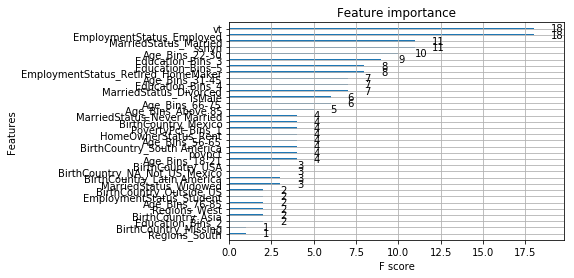

In [67]:
xgb.plot_importance(xg_reg)

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (100, 40),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)
plt.show()


In [68]:
# use DMatrix for xgboost
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features.columns)
dtest = xgb.DMatrix(X_test, label=y_test,feature_names=features.columns )

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [69]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 10, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 3, n_jobs = 2) 


In [70]:
optimized_GBM.fit(X_train, y_train)


/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in futu

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [71]:
GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)
optimized_GBM.grid_scores_





[mean: 0.92667, std: 0.00073, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.92667, std: 0.00073, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.92667, std: 0.00073, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.93036, std: 0.00020, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.93036, std: 0.00020, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.93036, std: 0.00020, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.93055, std: 0.00025, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.93053, std: 0.00024, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.93054, std: 0.00026, params: {'max_depth': 7, 'min_child_weight': 5}]

In [72]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 10, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = 2)


In [73]:
optimized_GBM.fit(X_train, y_train)

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in futu

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [74]:
GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)
optimized_GBM.grid_scores_

[mean: 0.92624, std: 0.00091, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.92625, std: 0.00091, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.92625, std: 0.00091, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.92452, std: 0.00228, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.92453, std: 0.00228, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.92453, std: 0.00228, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [75]:
xgdmat = xgb.DMatrix(X_train, y_train,feature_names=features.columns)

In [ ]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':7, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error


In [ ]:
cv_xgb.tail(5)


In [ ]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)


In [ ]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)


In [ ]:
'''xgb.plot_importance(final_gb)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (100, 80),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)
plt.show()'''

In [ ]:
'''features = features.columns

x, y = (list(x) for x in zip(*sorted(zip(xgb.feature_importances(), features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for XGBoost',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for XGBoost',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')'''

In [ ]:
import operator
importances = final_gb.get_fscore()
sorted_d = sorted(importances.items(), key=operator.itemgetter(1), reverse=True)
sorted_d

In [ ]:
testdmat = xgb.DMatrix(X_test, y_test,feature_names=features.columns)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
type(y_pred)
print (len(y_pred))

In [ ]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred


In [ ]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)
